In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

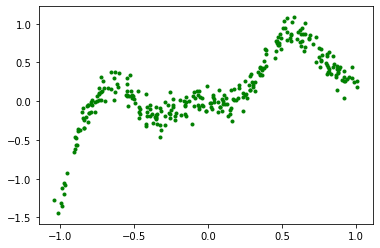

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [15]:
# optim = tnn.SGD()
optim = tnn.Adam(0.001, 0.5, 0.999)
linear = tnn.LinearLayer(1,1,optimizer=optim)

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

gaussian = tnn.Gaussian()

In [16]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dxl = linear.backward(dy*err_scaler)#*0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.2040175067569904


100 Error =  0.14164889386012067


200 Error =  0.11625272611424715


300 Error =  0.10642843256083974


400 Error =  0.10137703194825008


500 Error =  0.09786669515371123


600 Error =  0.09473059250341839


700 Error =  0.09303372471619852


800 Error =  0.09139098716846043


900 Error =  0.09021502703220881


1000 Error =  0.08894787027320654


1100 Error =  0.0883994133836925


1200 Error =  0.08794821474165494


1300 Error =  0.087622519222164


1400 Error =  0.08737259846113982


1500 Error =  0.08720339604356471


1600 Error =  0.08711118391780313


1700 Error =  0.08704353873923011


1800 Error =  0.08699425885780028


1900 Error =  0.08695910943119858


2000 Error =  0.08681800177654515


2100 Error =  0.08678235071573047


2200 Error =  0.08675978492723883


2300 Error =  0.08674577928068797


2400 Error =  0.0867158251951217


2500 Error =  0.08670972616692357


2600 Error =  0.08670636254117263


2700 Error =  0.08656451272582362


2800 Erro

TclError: invalid command name "pyimage70"

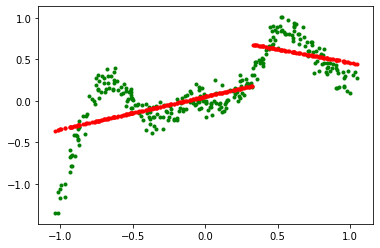

In [33]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [34]:
linear.weights, linear.bias

(array([[3.89335881]]), array([-1.26321376]))

## Sigmoid based,, it has gaussian gradient scaling

In [37]:
# optim = tnn.SGD()
optim = tnn.Adam(0.001)
linear = tnn.LinearLayer(1,1,optimizer=optim)

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [38]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dxl = linear.backward(sigmoid.backward(dy))#/0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
    
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.1996379215461344


100 Error =  0.13107341084905316


200 Error =  0.10314524963858152


300 Error =  0.09805076058582994


400 Error =  0.09805514876523069


500 Error =  0.0988775333497899


600 Error =  0.0967823879784076


700 Error =  0.09439703972059481


800 Error =  0.09115740573322038


900 Error =  0.08853785419401601


1000 Error =  0.08638987620676931


1100 Error =  0.08473980678347802


1200 Error =  0.08321736839321218


1300 Error =  0.08159312665211924


1400 Error =  0.08013329843449478


1500 Error =  0.07861443378556085


1600 Error =  0.07754730131094846


1700 Error =  0.07917364973457965


1800 Error =  0.0803001779878159


1900 Error =  0.08036497675061345


2000 Error =  0.07470018084900956


2100 Error =  0.07115574153521341


2200 Error =  0.0702739257713047


2300 Error =  0.0702022352518803


2400 Error =  0.07080989001473877


2500 Error =  0.07073024952210964


2600 Error =  0.07065391875367562


2700 Error =  0.07057474847588018


2800 Error

TclError: invalid command name "pyimage165"

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')
plt.show()
print(error)

In [ ]:
linear.weights, linear.bias

## Greedy best split

In [ ]:
splits = np.linspace(-1, 1, num=5000)

In [ ]:
def linear_regression(x_, y_):
#     xx_ = np.concatenate([xx, np.ones_like(xx)], axis=1)
#     mc = nalg.pinv(xx_)@yy

    x__ = np.vstack([x_, np.ones_like(x_)]).T
    mc = np.linalg.pinv(x__)@y_
    return mc

In [ ]:
def measure_split(split):
    mask = xx<split
    x1 = xx[mask]
    x2 = xx[~mask]
    y1 = yy[mask]
    y2 = yy[~mask]
    
    if np.count_nonzero(mask) == 0 or np.count_nonzero(~mask) == 0:
        out, error = np.zeros_like(yy), 9e9
        return out, error
    
    out = np.empty_like(yy)
    mc1 = linear_regression(x1, y1)
    mc2 = linear_regression(x2, y2)
    out[mask] = x1*mc1[0]+ mc1[1]
    out[~mask] = x2*mc2[0]+ mc2[1]
    
    error = ((out-yy)**2).mean()
    
    return out, error

In [ ]:
best_out = None
best_split = None
best_error = 9e9
for split in splits:
    out, error = measure_split(split)
    if error<best_error:
        best_error = error
        best_split = split
        best_out = out

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, best_out.reshape(-1), color='r', marker='.')
plt.show()
print(best_error)

In [ ]:
best_error

## Comparision with Double Relu (Continuous)

In [ ]:
optim = tnn.Adam(0.001)

net = tnn.AutoForm(new_layers=True)
l1 = tnn.LinearLayer(1,1,optimizer=optim)
l2 = tnn.DoubleReluLinearLayer(1,1, optimizer=optim)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout-yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')
plt.show()
print(error)